# Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("../..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.evaluation.data_utilities as eval_utils
import nucml.datasets as nuc_data
import nucml.evaluation.plot as eval_plot

In [2]:
# sns.set(font_scale=1.3)
sns.set(font_scale=2.5)
sns.set_style("white")

In [3]:
# Setting up the path where our figures will be stored
figure_dir = "./Figures/"

In [4]:
# FOR PROTOTYPE
import importlib
importlib.reload(exfor_utils)
importlib.reload(eval_utils)
importlib.reload(nuc_data)
importlib.reload(eval_plot)
print("Finish importing scripts.")

Finish importing scripts.


# Loading EXFOR

In [5]:
df = nuc_data.load_exfor()

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: False
INFO:root: LOG: False
INFO:root: BASIC: -1
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4255409, 104)
INFO:root:Finished. Resulting dataset has shape (4255409, 104)


In [11]:
df.MT = df.MT.astype(int)

# Visualizing Cross Sections (EXFOR + ENDF)

In [12]:
# Load new data, load chlorine35(n,p) exfor and evaluation
new_data = eval_utils.load_new("../New_Data/Chlorine_Data/new_cl_np.csv")
chlorine_35_np = exfor_utils.load_samples(df, 17, 35, 103)
chlorine_endf = nuc_data.load_evaluation("Cl035", "103")

INFO:root:Finish reading ENDF data with shape: (12, 4)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 104)
INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.


INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Be009/endfb8.0/tables/xs/n-Be009-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 444 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (36367, 104)


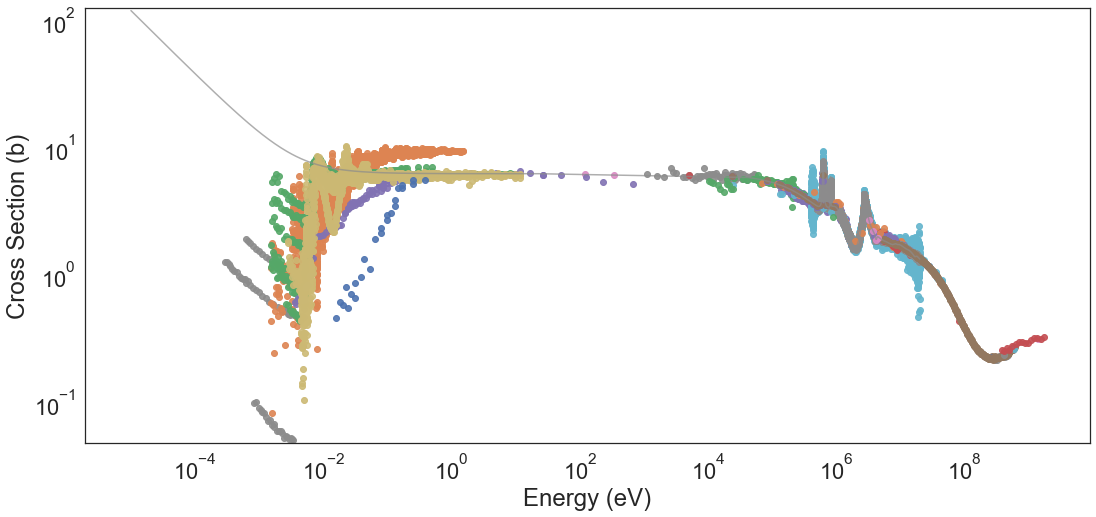

In [38]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

be_exfor_endf = exfor_utils.plot_exfor_w_references(df, 4, 9, 1, 
                                                    get_endf=True, 
                                                    error=True, 
                                                    save=True, 
                                                    path=figure_dir, 
                                                    figure_size=(18,8),
                                                    **kwargs)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/C012/endfb8.0/tables/xs/n-C012-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 1338 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (23562, 104)


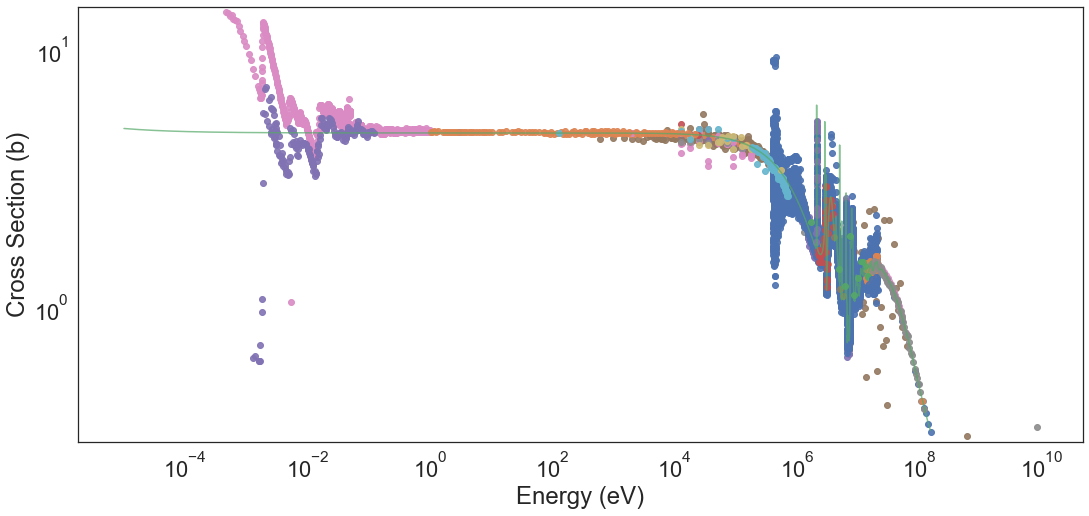

In [39]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

c_exfor_endf = exfor_utils.plot_exfor_w_references(df, 6, 12, 1, 
                                                    get_endf=True, 
                                                    error=True, 
                                                    save=True, 
                                                    path=figure_dir, 
                                                    figure_size=(18,8),
                                                    **kwargs)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/W184/endfb8.0/tables/xs/n-W184-MT102.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 34673 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (202, 104)


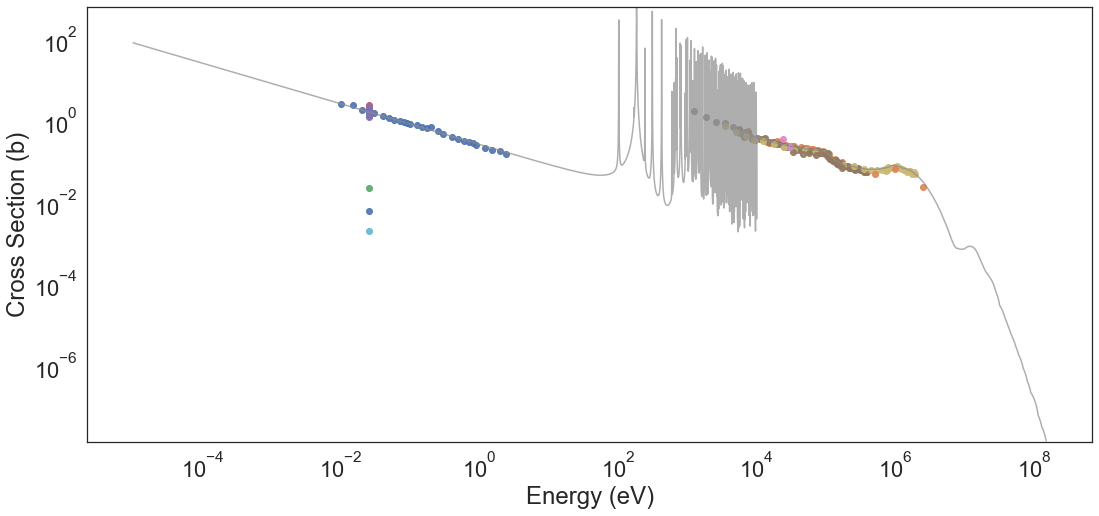

In [50]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

c_exfor_endf = exfor_utils.plot_exfor_w_references(df, 74, 184, 102, 
                                                    get_endf=True, 
                                                    error=True, 
                                                    save=True, 
                                                    path=figure_dir, 
                                                    figure_size=(18,8),
                                                    **kwargs)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 104)


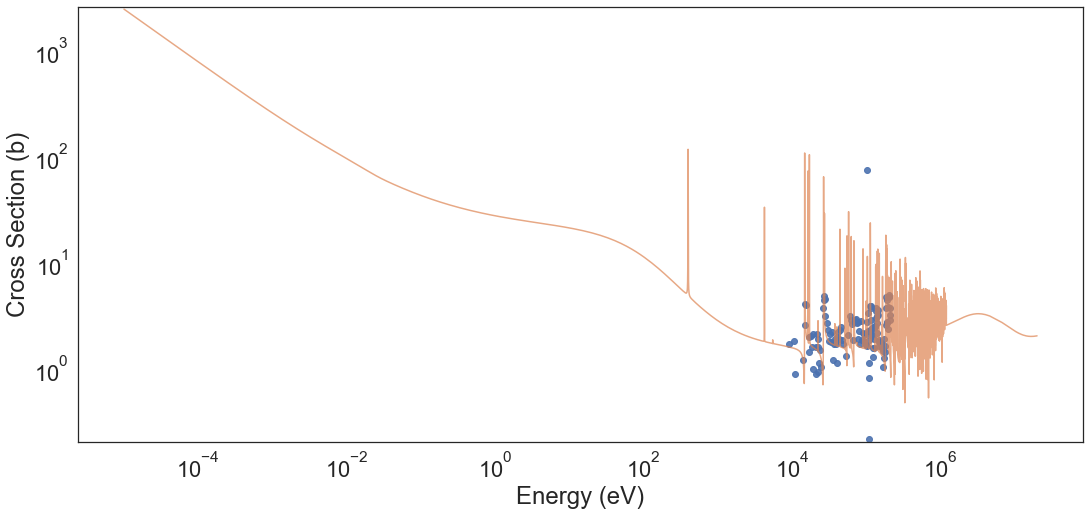

In [51]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

c_exfor_endf = exfor_utils.plot_exfor_w_references(df, 17, 35, 1, 
                                                    get_endf=True, 
                                                    error=True, 
                                                    save=True, 
                                                    path=figure_dir, 
                                                    figure_size=(18,8),
                                                    **kwargs)

In [41]:
df[(df.A == 26)].MT.value_counts()

107     606
102      36
1        32
103      12
9000      4
2         1
106       1
Name: MT, dtype: int64

In [46]:
df[(df.Z == 74) & (df.A == 184)].MT.value_counts()

1       29717
102       699
51        366
2         139
9000      100
18         59
103        40
16         36
107        21
3          15
4           8
17          1
1003        1
Name: MT, dtype: int64

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12617 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (33385, 104)


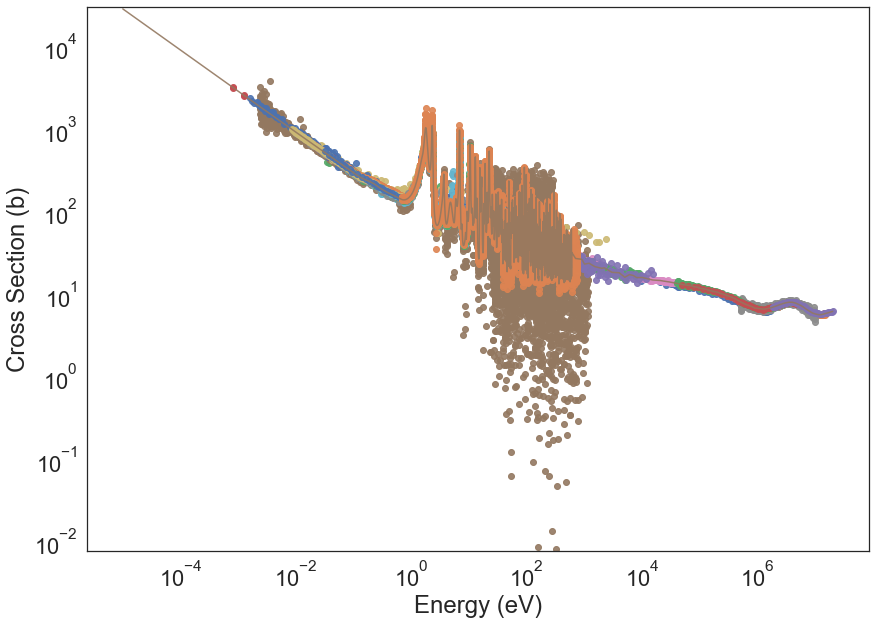

In [30]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.9, "legend":False, "interpolate":False, 
          "log_plot":True, "ref":True}

u_exfor_endf = exfor_utils.plot_exfor_w_references(df, 92, 233, "1", 
                                                   get_endf=True, 
                                                   error=True, 
                                                   save=True, 
                                                   path=figure_dir, 
                                                   **kwargs)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT102.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 19513 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (4588, 104)


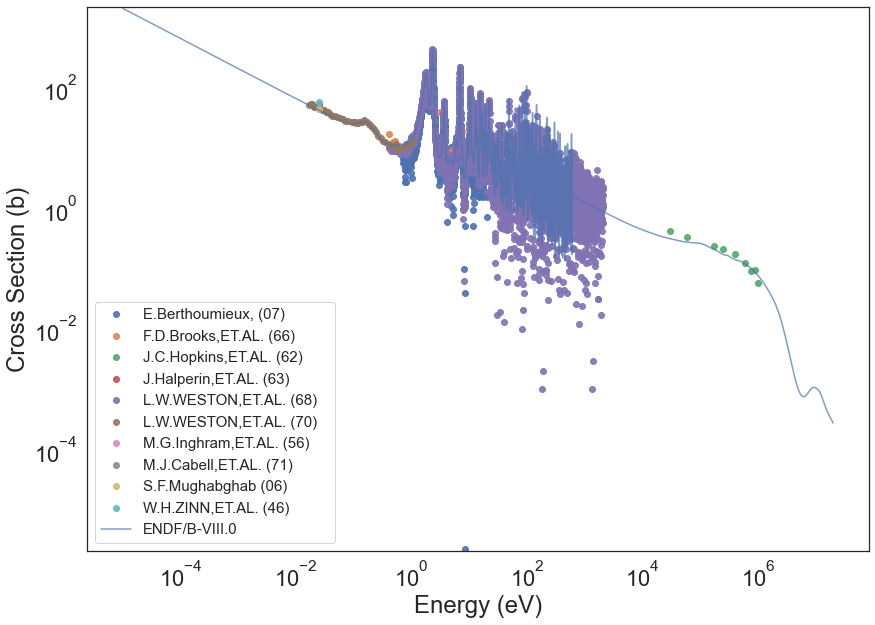

In [31]:
kwargs = {"nat_iso":"I", "one_hot":False, "alpha":0.7, "legend":True, "interpolate":False, 
          "log_plot":True, "ref":True}

u_exfor_endf = exfor_utils.plot_exfor_w_references(df, 92, 233, "102", 
                                                   get_endf=True, 
                                                   legend_size=15,
                                                   error=True, 
                                                   save=True, 
                                                   path=figure_dir, 
                                                   **kwargs)